In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Amount of null data: ')
print(train.isna().sum())

Amount of null data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
percent_train_nan = pd.DataFrame((train.isnull().sum() / train.shape[0]) * 100).sort_values(0, ascending=False)
percent_train_nan.rename(columns={0: 'Percent'}, inplace=True)
print(percent_train_nan.head())

               Percent
Cabin        77.104377
Age          19.865320
Embarked      0.224467
PassengerId   0.000000
Survived      0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

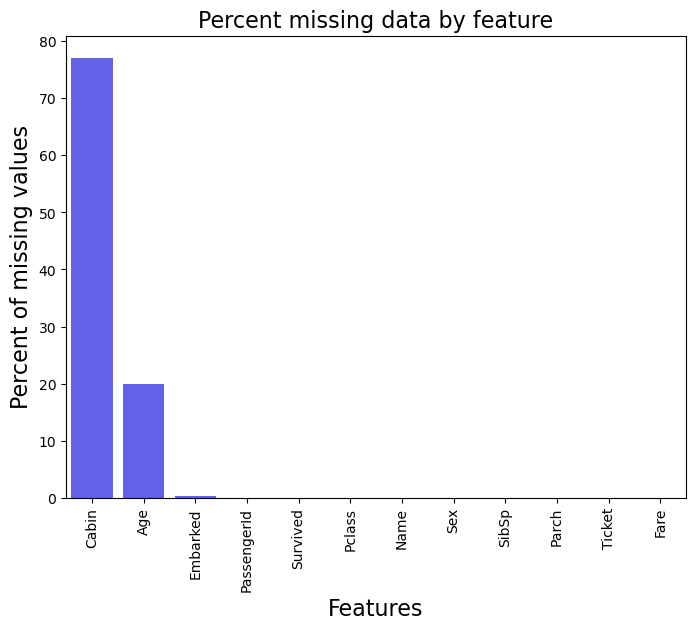

In [6]:
fig, ax = plt.subplots(figsize =(8, 6))
fig = sns.barplot(x = percent_train_nan.index, y = percent_train_nan['Percent'],color="blue",alpha=0.7)
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percent of missing values', fontsize=16)
plt.title('Percent missing data by feature', fontsize=16)

In [7]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
print('Amount of null data: ')
print(test.isna().sum())

Amount of null data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
percent_test_nan = pd.DataFrame((test.isnull().sum() / test.shape[0]) * 100).sort_values(0, ascending=False)
percent_test_nan.rename(columns={0: 'Percent'}, inplace=True)
print(percent_test_nan.head())

               Percent
Cabin        78.229665
Age          20.574163
Fare          0.239234
PassengerId   0.000000
Pclass        0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

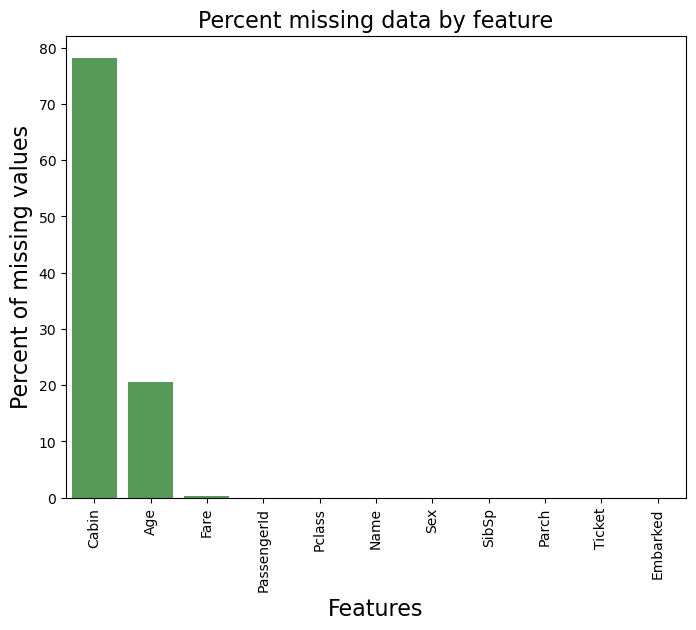

In [10]:
fig, ax = plt.subplots(figsize =(8, 6))
fig = sns.barplot(x = percent_test_nan.index, y = percent_test_nan['Percent'],color="green",alpha=0.7)
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percent of missing values', fontsize=16)
plt.title('Percent missing data by feature', fontsize=16)

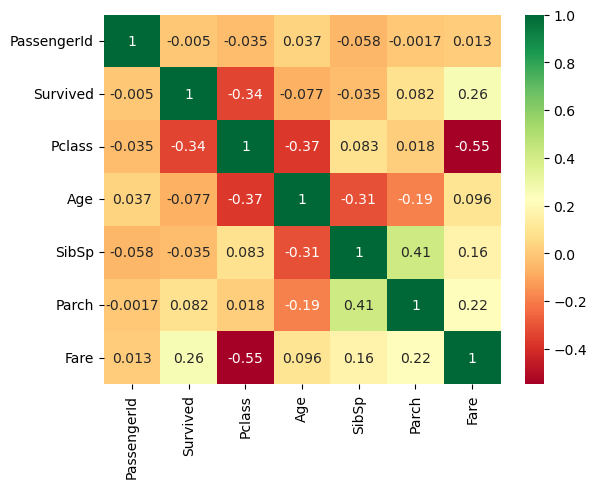

In [11]:
matrix_correlation = train.corr(numeric_only = True)
sns.heatmap(matrix_correlation, annot = True, cmap = 'RdYlGn')
fig = plt.gcf()
plt.show()

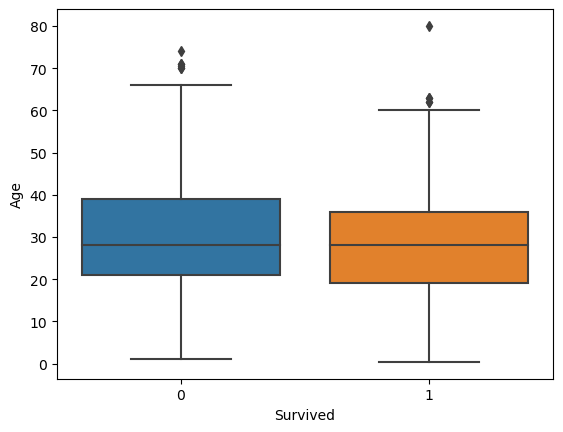

In [12]:
sns.boxplot(train, x =  'Survived', y = 'Age')
plt.show()

In [13]:
'''Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1

filter = (train['Age'] >= Q1 - 1.5 * IQR) & (train['Age'] <= Q3 + 1.5 *IQR)
train = train.loc[filter]'''

"Q1 = train['Age'].quantile(0.25)\nQ3 = train['Age'].quantile(0.75)\nIQR = Q3 - Q1\n\nfilter = (train['Age'] >= Q1 - 1.5 * IQR) & (train['Age'] <= Q3 + 1.5 *IQR)\ntrain = train.loc[filter]"

In [14]:
'''Q1 = test['Fare'].quantile(0.25)
Q3 = test['Fare'].quantile(0.75)
IQR = Q3 - Q1

filter = (test['Fare'] >= Q1 - 1.5 * IQR) & (test['Fare'] <= Q3 + 1.5 *IQR)
test = test.loc[filter]'''

"Q1 = test['Fare'].quantile(0.25)\nQ3 = test['Fare'].quantile(0.75)\nIQR = Q3 - Q1\n\nfilter = (test['Fare'] >= Q1 - 1.5 * IQR) & (test['Fare'] <= Q3 + 1.5 *IQR)\ntest = test.loc[filter]"

In [15]:
train["AgeBucket"] = train["Age"] // 15 * 15
train[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [16]:
test["AgeBucket"] = test["Age"] // 15 * 15

In [17]:
train["RelativesOnboard"] = train["SibSp"] + train["Parch"]
train[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [18]:
test["RelativesOnboard"] = test["SibSp"] + test["Parch"]

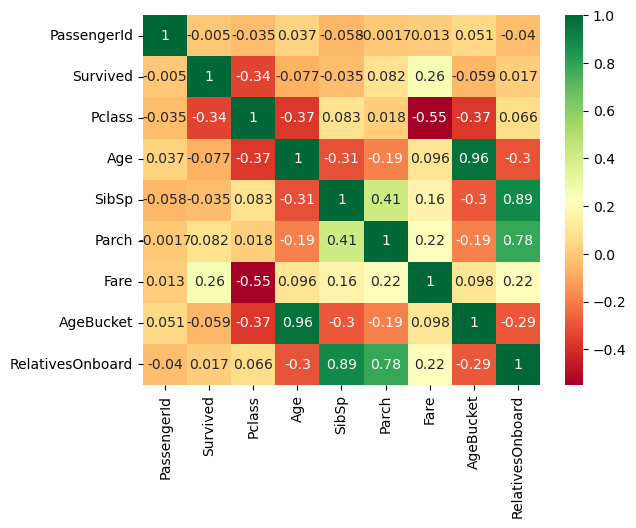

In [19]:
matrix_correlation = train.corr(numeric_only = True)
sns.heatmap(matrix_correlation, annot = True, cmap = 'RdYlGn')
fig = plt.gcf()
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler())
    ])

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("cat_encoder", OneHotEncoder()),
    ])

In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare", ]
cat_attribs = ["Pclass", "Sex", "Embarked", 'RelativesOnboard', 'AgeBucket']

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [23]:
X_train = preprocess_pipeline.fit_transform(train[num_attribs + cat_attribs])

In [24]:
y_train = train['Survived']

In [25]:
X_test = preprocess_pipeline.transform(test[num_attribs + cat_attribs])

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  

svc = SVC()
svm_clf = GridSearchCV(svc, param_grid, refit = True,n_jobs=-1)
svm_clf.fit(X_train, y_train)
print(svm_clf.best_params_)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
final_model = SVC(gamma = 'scale', kernel = 'linear')
final_model.fit(X_train, y_train)
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_scores.mean()

0.8159186491745654

In [28]:
y_pred = final_model.predict(X_test)

In [29]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index = False)
print("Congratulations!")

Congratulations!
